In [2]:
# подключим библиотеки Pandas, Numpy, SciPy, Math и matpolotlib
import pandas as pd
import numpy as np
from scipy import stats as st
from math import factorial
import matplotlib.pyplot as plt




In [3]:
# прочитаем данные из файла 
users_data = pd.read_csv('/datasets/users.csv')

# и проверим чтение из файла
users_data.head()



,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [4]:
# прочитаем данные из файла 
calls_data = pd.read_csv('/datasets/calls.csv')

# и проверим чтение из файла
calls_data.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [5]:
# прочитаем данные из файла 
internet_data = pd.read_csv('/datasets/internet.csv')

# и проверим чтение из файла
internet_data.head()


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [6]:
# прочитаем данные из файла 
messages_data = pd.read_csv('/datasets/messages.csv')

# и проверим чтение из файла
messages_data.head()


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [7]:
# прочитаем данные из файла 
tariffs_data = pd.read_csv('/datasets/tariffs.csv')

# и проверим чтение из файла
tariffs_data.head()


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


## Подготовка данных

Проверим сразу типы данных во всех датасетах и корректность написания названия столбцов

In [8]:

# создадим словарь, со всеми фреймами и в цикле вызовем метод .info() для каждого
dictionary_with_all_data = {
        'users_data':users_data, 
         'calls_data' :calls_data,
          'internet_data':internet_data,
          'messages_data':messages_data,
          'tariffs_data':tariffs_data
}

# будем иттерироваться по словарю через пару ключь:значение. Ключь нам нужен, чтоб мы понимали инфо о какой таблице выводим
for key, value in dictionary_with_all_data.items():
    print("Таблица:",key)
    print(value.columns,'\n')
    print(value.info(),'\n')
    

Таблица: users_data
Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff'],
      dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None 

Таблица: calls_data
Index(['id', 'call_date', 'duration', 'user_id'], dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None 

Таблица: i

Взглянув на типы данных в таблице, можно придти к следующим выводам:
- В таблице users_data дата регистрации и дата растожнения не типа даты.
- В таблице calls_data дата звонка не типа даты.
- В таблице internet_data дата сессии не типа даты.
- В таблице message_datа дата сообщения не типа даты.

Заменим эти типы на соответствующие

In [9]:
users_data['reg_date'] = pd.to_datetime(users_data['reg_date'], format='%Y-%m-%d')
users_data['churn_date'] = pd.to_datetime(users_data['churn_date'], format='%Y-%m-%d')
calls_data['call_date'] = pd.to_datetime(calls_data['call_date'], format='%Y-%m-%d')
internet_data['session_date'] = pd.to_datetime(internet_data['session_date'], format='%Y-%m-%d')
messages_data['message_date'] = pd.to_datetime(messages_data['message_date'], format='%Y-%m-%d')

# и проверим 
for key, value in dictionary_with_all_data.items():
    print("Таблица:",key)
    print(value.info(),'\n')


Таблица: users_data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
None 

Таблица: calls_data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB
None 

Таблица: internet_data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0 

Теперь можно посмотреть, есть ли у нас пропущенные данные

In [10]:
for key, value in dictionary_with_all_data.items():
    print("Таблица:",key)
    print(value.isna().sum(),'\n')


Таблица: users_data
user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64 

Таблица: calls_data
id           0
call_date    0
duration     0
user_id      0
dtype: int64 

Таблица: internet_data
Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64 

Таблица: messages_data
id              0
message_date    0
user_id         0
dtype: int64 

Таблица: tariffs_data
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64 



Как видим, пропуски в данных у нас есть только во фрейме данных клиентов, в колонке, которая соответствует дате расторжения договора. Т.е. если отсутствуют данные, то тариф еще действует, поэтому не будем удалять такие строки или как-либо пытаться востановить данные, а просто пометим людей с действующим тарифным планом, проставив вместо пустых значений нули.

In [11]:
# пометим людей с действующими тарифными планами
users_data['churn_date'] = users_data['churn_date'].fillna(0)

# и еще раз проверим данные
users_data.isna().sum()

user_id       0
age           0
churn_date    0
city          0
first_name    0
last_name     0
reg_date      0
tariff        0
dtype: int64

Отлично, с пропусками данных разобрались! Перейдем к следующему этапу. Есть ли в данных дубликаты? Поскольку данные разбросаны по расным фреймам данных, соберем их в один фрейм и проверим дубликаты строк.

In [12]:
# соберем звонки по клиентам и сбросим индексы
calls_pivot = calls_data.pivot_table(index=['user_id', 'call_date'], values='duration', aggfunc='sum').reset_index(level=1)

# соберем сообщенмя по клиентам и сбросим индексы
messages_pivot = messages_data.pivot_table(index=['user_id', 'message_date'], values='id', aggfunc='count').reset_index(level=1)

# чтобы было понятно, что в столбце id стоят уже не id, а количество сообщений, переименуем этот столбец
messages_pivot.rename(columns=lambda x: x.replace('id', 'number_of_messages'), inplace=True)

# соберем историю интернет-трафика по клиентам и сбросим индексы
internet_pivot = internet_data.pivot_table(index=['user_id', 'session_date'], values='mb_used', aggfunc='sum').reset_index(level=1)



# склеим таблицы клиентов и тарифов
# поскольку в полученной таблицы тариф стоит в колонке "tariff", а во фрейме tariffs_data в колонке tariff_name, то переименуем
# колонку в tariffs_data 
tariffs_data.rename(columns=lambda x: x.replace('tariff_name', 'tariff'), inplace=True)

# создадим таблицу клиентов с полным описанием тарифов
users_tariffs = users_data.merge(tariffs_data, on='tariff', how='outer')

# добавим в эту таблицу звонки
users_tariffs_calls = users_tariffs.merge(calls_pivot, on='user_id', how='outer')

# создадим таблицу клиентов с полным описанием тарифов и информации о текстинге
users_tariffs_messages = users_tariffs.merge(messages_pivot, on='user_id', how='outer')


# создадим таблицу клиентов с полным описанием тарифов и информации о интернет-трафике
users_tariffs_internet = users_tariffs.merge(internet_pivot, on='user_id', how='outer')


# объеденим все полученные таблицы в один супер-сет данных

users_tariffs_calls.set_index('user_id')
users_tariffs_messages.set_index('user_id')
users_tariffs_internet.set_index('user_id')

all_data = users_tariffs_calls.join(users_tariffs_messages[['message_date','number_of_messages']])


all_data = all_data.join(users_tariffs_internet[['session_date','mb_used']])


Ура, мы собрали все данные в один датасет. Поскольку мы знаем, что в исходных датасетах все данные были, то в полученном нам осталось только пометить отсутствующие данные, например нулями. Данные могут отсутствовать, в силу того, что клиент в определенную дату мог, например пользоваться интернетом и звонить, но не отправлять сообщения, тогда в колонке сообщений не будет хватать данных.

In [13]:
# пометим все нехватки данных нулями
all_data = all_data.fillna(0)

# и посмотрим количество дубликатов
all_data.duplicated().sum()


0

Явных дублей нет, пропусков нет, но осталось проверить есть ли не явные дубли в списке городов. Нет ли там одинаковых городов записанных по разному?

In [14]:
# посмотрим список городов отсортированный в алфавитном порядке
sorted(all_data['city'].unique())

['Архангельск',
 'Астрахань',
 'Балашиха',
 'Барнаул',
 'Белгород',
 'Брянск',
 'Владивосток',
 'Владикавказ',
 'Владимир',
 'Волгоград',
 'Волжский',
 'Вологда',
 'Воронеж',
 'Грозный',
 'Екатеринбург',
 'Иваново',
 'Ижевск',
 'Иркутск',
 'Казань',
 'Калининград',
 'Калуга',
 'Кемерово',
 'Киров',
 'Кострома',
 'Краснодар',
 'Красноярск',
 'Курган',
 'Курск',
 'Липецк',
 'Магнитогорск',
 'Махачкала',
 'Москва',
 'Мурманск',
 'Набережные Челны',
 'Нижневартовск',
 'Нижний Новгород',
 'Нижний Тагил',
 'Новокузнецк',
 'Новороссийск',
 'Новосибирск',
 'Омск',
 'Оренбург',
 'Орёл',
 'Пенза',
 'Пермь',
 'Петрозаводск',
 'Подольск',
 'Ростов-на-Дону',
 'Рязань',
 'Самара',
 'Санкт-Петербург',
 'Саранск',
 'Саратов',
 'Севастополь',
 'Смоленск',
 'Сочи',
 'Ставрополь',
 'Стерлитамак',
 'Сургут',
 'Тамбов',
 'Тверь',
 'Тольятти',
 'Томск',
 'Тула',
 'Тюмень',
 'Улан-Удэ',
 'Ульяновск',
 'Уфа',
 'Хабаровск',
 'Химки',
 'Чебоксары',
 'Челябинск',
 'Череповец',
 'Чита',
 'Якутск',
 'Ярославль']

Отлично, неявных дублей тоже нет. А это значит наши данные все собраны в один фрейм данных, не имеют пропусков и дубликатов. Предобработка данных прошла успешна, можно приступать к анализу.

***Расчеты для каждого пользователя***

Посчитаем для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

***Количество сделанных звонков и израсходованных минут разговора по месяцам для каждого пользователя***

In [15]:
# посчитаем количество сделанных звонков по месяцам

# сначала сделаем добавим в calls_data столбец с месяцем
calls_data['month']=pd.DatetimeIndex(calls_data['call_date']).month


# посчитаем количество звонков и потраченных минут по месяца для каждого пользователя
total_calls_and_minuts_per_user_per_month = calls_data.pivot_table(index=['user_id','month'], values='duration', 
                                               aggfunc=('count','sum')).reset_index()

# переименуем колонки для большей информативности
total_calls_and_minuts_per_user_per_month.rename(columns=lambda x: x.replace('count', 'total_calls'), inplace=True)
total_calls_and_minuts_per_user_per_month.rename(columns=lambda x: x.replace('sum', 'total_duration'), inplace=True)

total_calls_and_minuts_per_user_per_month

,user_id,month,total_calls,total_duration
0,1000,5,22,150.06
1,1000,6,43,158.90
2,1000,7,47,318.80
3,1000,8,52,389.87
4,1000,9,58,440.14
...,...,...,...,...
3169,1498,10,41,232.63
3170,1499,9,9,64.65
3171,1499,10,68,429.91
3172,1499,11,74,576.50


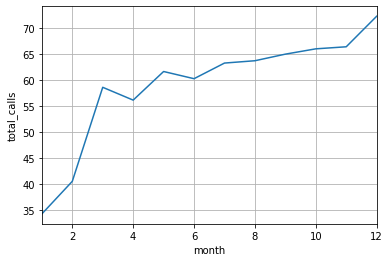

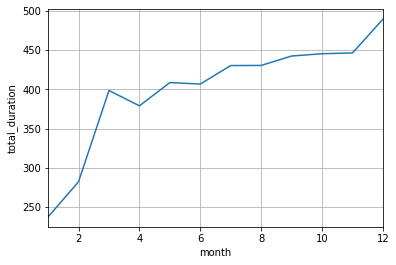

In [16]:
# построим график среднего количества звонков и средней продолжительности звонков по месяцам
total_calls_and_minuts_per_month = total_calls_and_minuts_per_user_per_month.pivot_table(index='month', 
                                                      values=['total_calls','total_duration'], aggfunc='mean')

total_calls_and_minuts_per_month['total_calls'].plot(grid=True)
plt.ylabel('total_calls')
plt.show()
total_calls_and_minuts_per_month['total_duration'].plot(grid=True)
plt.ylabel('total_duration')
plt.show()

Достаточно интересная картина, в июне количество звонков, по отношению к маю упала, а вот количество минут-нет. То есть люди стали звонить меньше, но разговаривать дольше. Противоположная ситуация наблюдается с сентябрем, когда люди стали звонить больше, но разговаривать меньше.

***Количество отправленных сообщений по месяцам для каждого пользователя***

In [17]:
# посчитаем количество отправленных сообщений по месяцам
# сначала сделаем добавим в message_data столбец с месяцем
messages_data['month']=pd.DatetimeIndex(messages_data['message_date']).month

# посчитаем количество сообщений по месяца для каждого пользователя
total_messages_per_user_per_month = messages_data.pivot_table(index=['user_id','month'], 
                                      values='message_date', aggfunc='count').reset_index()

# переименуем колонки для большей информативности
total_messages_per_user_per_month.rename(columns=lambda x: x.replace('message_date', 'total_messages'), inplace=True)

total_messages_per_user_per_month

,user_id,month,total_messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


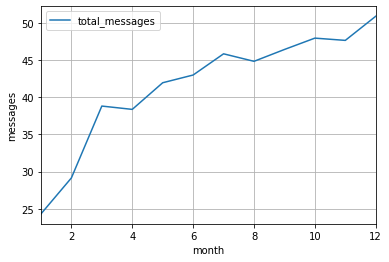

In [18]:
# построим график среднего количества сообщений по месяцам
total_messages_per_user_per_month.pivot_table(index='month',values='total_messages', aggfunc='mean').plot(grid=True)
plt.ylabel('messages')
plt.show()

А вот, возможно и разгадка эффекта, что в мае люди звонили меньше, но дольше: скорее всего, для коротких переговоров они стали использовать сообщения, а для долгих - звонки. Хотя возможно, они переключились на мессенджеры и активно стали использовать интернет-трафик.

***Количество интернет-трафика по месяцам для каждого пользователя***

In [19]:
# посчитаем количество интернет-трафика по месяцам
# сначала сделаем добавим в internet_data столбец с месяцем
internet_data['month']=pd.DatetimeIndex(internet_data['session_date']).month

# посчитаем количество трфаика по месяца для каждого пользователя
total_internet_per_user_per_month = internet_data.pivot_table(index=['user_id','month'], 
                                      values='mb_used', aggfunc='sum').reset_index()

total_internet_per_user_per_month

,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
...,...,...,...
3198,1498,10,20579.36
3199,1499,9,1845.75
3200,1499,10,17788.51
3201,1499,11,17963.31


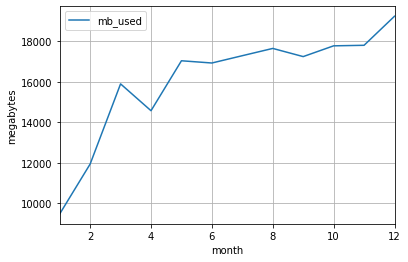

In [20]:
# построим график среднего количества трафика по месяцам
total_internet_per_user_per_month.pivot_table(index='month', values='mb_used', aggfunc='mean').plot(grid=True)
plt.ylabel('megabytes')
plt.show()


А, нет, не стали они использовать в июне больше трафика чем в мае, значит все таки переключились на сообщения для быстрых обсуждений

***Помесячная выручка с каждого пользователя***

In [21]:
# посчитаем помесячную выручку с каждого пользователя 
# вычтим бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; 
# остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану


# объеденим предыдущие 3 таблицы
total_calls_messages_per_user_per_month = total_calls_and_minuts_per_user_per_month.merge(
                                                    total_messages_per_user_per_month, how='outer')

total_calls_messages_internet_per_user_per_month = total_calls_messages_per_user_per_month.merge(
                                                    total_internet_per_user_per_month, how='outer') 

# добавим тариф
total_calls_messages_internet_per_user_per_month = total_calls_messages_internet_per_user_per_month.merge(
                                                    users_data[['user_id','tariff']], how='left', 
                                                    left_on='user_id', right_on='user_id')

# и описание тарифа
#print(total_calls_messages_internet_per_user_per_month.head())
#print(tariffs_data.head())
total_calls_messages_internet_per_user_per_month = total_calls_messages_internet_per_user_per_month.merge(
                                                        tariffs_data, left_on='tariff', 
                                                        right_on='tariff', how='outer')

total_calls_messages_internet_per_user_per_month

,user_id,month,total_calls,total_duration,total_messages,mb_used,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22.0,150.06,22.0,2253.49,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,43.0,158.90,60.0,23233.77,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,47.0,318.80,75.0,14003.64,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,52.0,389.87,81.0,14055.93,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,58.0,440.14,57.0,14568.91,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,NaN,NaN,17.0,11050.56,smart,50,15360,500,550,200,3,3
3210,1489,9,NaN,NaN,32.0,17206.30,smart,50,15360,500,550,200,3,3
3211,1489,10,NaN,NaN,21.0,19559.44,smart,50,15360,500,550,200,3,3
3212,1489,11,NaN,NaN,20.0,17491.56,smart,50,15360,500,550,200,3,3


Поскольку в исходных данных не было пропусков, а в объединенной таблице они появились, то можем смело заменить их на нули. Пропуски появляются в силу того факта, что, например, клиент мог не пользоваться интернетом в определенный месяц, но мог совершать звонки или писать сообщения.

In [22]:
total_calls_messages_internet_per_user_per_month = total_calls_messages_internet_per_user_per_month.fillna(0)
total_calls_messages_internet_per_user_per_month

,user_id,month,total_calls,total_duration,total_messages,mb_used,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22.0,150.06,22.0,2253.49,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,43.0,158.90,60.0,23233.77,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,47.0,318.80,75.0,14003.64,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,52.0,389.87,81.0,14055.93,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,58.0,440.14,57.0,14568.91,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0.0,0.00,17.0,11050.56,smart,50,15360,500,550,200,3,3
3210,1489,9,0.0,0.00,32.0,17206.30,smart,50,15360,500,550,200,3,3
3211,1489,10,0.0,0.00,21.0,19559.44,smart,50,15360,500,550,200,3,3
3212,1489,11,0.0,0.00,20.0,17491.56,smart,50,15360,500,550,200,3,3


In [23]:
# посчитаем количество минут, сообщений и интернета сверх пакета
# для этого применим функцию. Если лимит не превышен, то будем ставить 0, иначе считать на сколько именно превышен

    # считаем кол-во минут сверх пакета
def mins_over_included(row):
    if row['minutes_included'] < row ['total_duration']:
        return row ['total_duration'] - row['minutes_included']
                                         
    else:
        return  0

    # считаем кол-во сообщений сверх пакета
def messages_over_included(row):    
    if row['messages_included'] < row ['total_messages']:
        return row ['total_messages'] - row['messages_included']
    else:
        return 0

    # считаем кол-во интернета сверх пакета
def internet_over_included(row):
    if row['mb_per_month_included'] < row ['mb_used']:
        return row ['mb_used'] - row['mb_per_month_included']
    else:
        return 0


total_calls_messages_internet_per_user_per_month['mins_over_included'] = total_calls_messages_internet_per_user_per_month.apply(mins_over_included, axis=1)

total_calls_messages_internet_per_user_per_month['messages_over_included'] = total_calls_messages_internet_per_user_per_month.apply(messages_over_included, axis=1)

total_calls_messages_internet_per_user_per_month['mb_over_included'] = total_calls_messages_internet_per_user_per_month.apply(internet_over_included, axis=1)

total_calls_messages_internet_per_user_per_month


,user_id,month,total_calls,total_duration,total_messages,mb_used,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,mins_over_included,messages_over_included,mb_over_included
0,1000,5,22.0,150.06,22.0,2253.49,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.00
1,1000,6,43.0,158.90,60.0,23233.77,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.00
2,1000,7,47.0,318.80,75.0,14003.64,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.00
3,1000,8,52.0,389.87,81.0,14055.93,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.00
4,1000,9,58.0,440.14,57.0,14568.91,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0.0,0.00,17.0,11050.56,smart,50,15360,500,550,200,3,3,0.0,0.0,0.00
3210,1489,9,0.0,0.00,32.0,17206.30,smart,50,15360,500,550,200,3,3,0.0,0.0,1846.30
3211,1489,10,0.0,0.00,21.0,19559.44,smart,50,15360,500,550,200,3,3,0.0,0.0,4199.44
3212,1489,11,0.0,0.00,20.0,17491.56,smart,50,15360,500,550,200,3,3,0.0,0.0,2131.56


In [24]:
# посчитаем стоимость минут, сообщений и интернета сверх пакета
# поскольку «Мегалайн» всегда округляет вверх значения минут и мегабайтов, то будем округлять вверх 

import math
    
    # стоимость минут
def cost_mins_over_included(row):
    return math.ceil(row['mins_over_included']) * row['rub_per_minute']

    # стоимость сообщений
def cost_messages_over_included(row):
    return row['messages_over_included'] * row['rub_per_message']

    # стоимость интернета
    # поскольку стоимость сверх пакета указана за гб, то чтоб получить стоимость 1мб будем делить на 1024
def cost_mb_over_included(row):
    return math.ceil(row['mb_over_included']) * row['rub_per_gb']/1024


total_calls_messages_internet_per_user_per_month['cost_mins_over_included'] = total_calls_messages_internet_per_user_per_month.apply(cost_mins_over_included, axis=1)


total_calls_messages_internet_per_user_per_month['cost_messages_over_included'] = total_calls_messages_internet_per_user_per_month.apply(cost_messages_over_included, axis=1)


total_calls_messages_internet_per_user_per_month['cost_mb_over_included'] = total_calls_messages_internet_per_user_per_month.apply(cost_mb_over_included, axis=1)


total_calls_messages_internet_per_user_per_month


,user_id,month,total_calls,total_duration,total_messages,mb_used,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,mins_over_included,messages_over_included,mb_over_included,cost_mins_over_included,cost_messages_over_included,cost_mb_over_included
0,1000,5,22.0,150.06,22.0,2253.49,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.00,0,0.0,0.000000
1,1000,6,43.0,158.90,60.0,23233.77,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.00,0,0.0,0.000000
2,1000,7,47.0,318.80,75.0,14003.64,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.00,0,0.0,0.000000
3,1000,8,52.0,389.87,81.0,14055.93,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.00,0,0.0,0.000000
4,1000,9,58.0,440.14,57.0,14568.91,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.00,0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0.0,0.00,17.0,11050.56,smart,50,15360,500,550,200,3,3,0.0,0.0,0.00,0,0.0,0.000000
3210,1489,9,0.0,0.00,32.0,17206.30,smart,50,15360,500,550,200,3,3,0.0,0.0,1846.30,0,0.0,360.742188
3211,1489,10,0.0,0.00,21.0,19559.44,smart,50,15360,500,550,200,3,3,0.0,0.0,4199.44,0,0.0,820.312500
3212,1489,11,0.0,0.00,20.0,17491.56,smart,50,15360,500,550,200,3,3,0.0,0.0,2131.56,0,0.0,416.406250


In [25]:
# посчитаем помесячный доход с пользователей
total_calls_messages_internet_per_user_per_month['total_income'] = (total_calls_messages_internet_per_user_per_month ['cost_mins_over_included']+
                                                                    total_calls_messages_internet_per_user_per_month ['cost_messages_over_included']+
                                                                    total_calls_messages_internet_per_user_per_month ['cost_mb_over_included']+
                                                                    total_calls_messages_internet_per_user_per_month ['rub_monthly_fee'])
# уберем лишние колонки и покажем только необходимое
total_calls_messages_internet_per_user_per_month.pivot_table(index=['user_id','month','tariff'], values='total_income', aggfunc=('sum')).reset_index()

,user_id,month,tariff,total_income
0,1000,5,ultra,1950.000000
1,1000,6,ultra,1950.000000
2,1000,7,ultra,1950.000000
3,1000,8,ultra,1950.000000
4,1000,9,ultra,1950.000000
...,...,...,...,...
3209,1498,10,smart,1569.531250
3210,1499,9,smart,550.000000
3211,1499,10,smart,1024.414062
3212,1499,11,smart,1316.593750


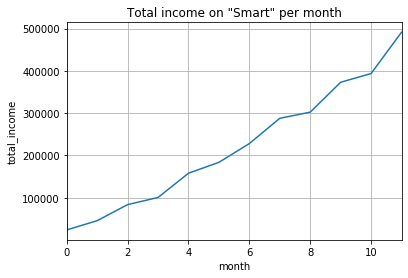

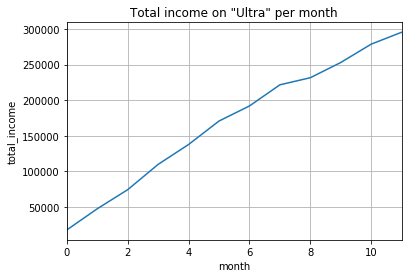

In [26]:
total_calls_messages_internet_per_user_per_month.pivot_table(index=['month','tariff'], 
                                                            values='total_income', aggfunc=('sum')).reset_index().query(
                                                            'tariff=="smart"').reset_index()['total_income'].plot(grid=True)
plt.xlabel('month')
plt.ylabel('total_income')
plt.title('Total income on "Smart" per month')
plt.show()
total_calls_messages_internet_per_user_per_month.pivot_table(index=['month','tariff'], 
                                                             values='total_income', aggfunc=('sum')).reset_index().query(
                                                            'tariff=="ultra"').reset_index()['total_income'].plot(grid=True)
plt.xlabel('month')
plt.ylabel('total_income')
plt.title('Total income on "Ultra" per month')
plt.show()


## Анализ данных

Опишем поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы. Опишем распределения.

In [27]:


# посчитаем сколько минут трубуется пользователям каждого тарифа

mins_per_tariff_per_month = total_calls_messages_internet_per_user_per_month.pivot_table(
                                                            index=['month','tariff'], 
                                                             values='total_calls', 
                                                             aggfunc=('sum','count')).reset_index()

# переименуем для большей ясности
mins_per_tariff_per_month.rename(columns=lambda x: x.replace('sum', 'total_minutes'), inplace=True)
mins_per_tariff_per_month.rename(columns=lambda x: x.replace('count', 'total_users'), inplace=True)

mins_per_tariff_per_month['avg_minutes_per_user'] = mins_per_tariff_per_month['total_minutes'] / mins_per_tariff_per_month['total_users']

mins_per_tariff_per_month



,month,tariff,total_users,total_minutes,avg_minutes_per_user
0,1,smart,34,941.0,27.676471
1,1,ultra,9,535.0,59.444444
2,2,smart,58,2331.0,40.189655
3,2,ultra,24,997.0,41.541667
4,3,smart,77,4183.0,54.324675
5,3,ultra,37,2504.0,67.675676
6,4,smart,112,5747.0,51.312500
7,4,ultra,55,3525.0,64.090909
8,5,smart,141,7789.0,55.241135
9,5,ultra,67,4858.0,72.507463


In [28]:
# посчитаем сколько сообщений трубуется пользователям каждого тарифа

messages_per_tariff_per_month = total_calls_messages_internet_per_user_per_month.pivot_table(
                                                            index=['month','tariff'], 
                                                             values='total_messages', 
                                                             aggfunc=('sum','count')).reset_index()

# переименуем для большей ясности
messages_per_tariff_per_month.rename(columns=lambda x: x.replace('sum', 'total_messages'), inplace=True)
messages_per_tariff_per_month.rename(columns=lambda x: x.replace('count', 'total_users'), inplace=True)

messages_per_tariff_per_month['avg_messages_per_user'] = messages_per_tariff_per_month['total_messages'] / messages_per_tariff_per_month['total_users']

messages_per_tariff_per_month



,month,tariff,total_users,total_messages,avg_messages_per_user
0,1,smart,34,620.0,18.235294
1,1,ultra,9,304.0,33.777778
2,2,smart,58,1397.0,24.086207
3,2,ultra,24,527.0,21.958333
4,3,smart,77,2453.0,31.857143
5,3,ultra,37,1195.0,32.297297
6,4,smart,112,3443.0,30.741071
7,4,ultra,55,1736.0,31.563636
8,5,smart,141,4762.0,33.773050
9,5,ultra,67,2536.0,37.850746


In [29]:
# посчитаем сколько трафика трубуется пользователям каждого тарифа

mb_per_tariff_per_month = total_calls_messages_internet_per_user_per_month.pivot_table(
                                                            index=['month','tariff'], 
                                                             values='mb_used', 
                                                             aggfunc=('sum','count')).reset_index()

# переименуем для большей ясности
mb_per_tariff_per_month.rename(columns=lambda x: x.replace('sum', 'total_mb'), inplace=True)
mb_per_tariff_per_month.rename(columns=lambda x: x.replace('count', 'total_users'), inplace=True)

mb_per_tariff_per_month['avg_mb_per_user'] = mb_per_tariff_per_month['total_mb'] / mb_per_tariff_per_month['total_users']

mb_per_tariff_per_month




,month,tariff,total_users,total_mb,avg_mb_per_user
0,1,smart,34,289466.40,8513.717647
1,1,ultra,9,118266.13,13140.681111
2,2,smart,58,672629.15,11597.054310
3,2,ultra,24,282622.50,11775.937500
4,3,smart,77,1163020.25,15104.159091
5,3,ultra,37,648815.36,17535.550270
6,4,smart,112,1507764.23,13462.180625
7,4,ultra,55,925547.39,16828.134364
8,5,smart,141,2228530.99,15805.184326
9,5,ultra,67,1297331.25,19363.152985


In [30]:
# склеим в одну таблицу среднее на 1 абонента количество минут, сообщений и трафика в месяц в зависимости от тарифа
avg_minutes_and_mb = mins_per_tariff_per_month.merge(mb_per_tariff_per_month[['month','tariff','avg_mb_per_user']], 
                                                   how='outer', left_on=['month','tariff'], 
                                                   right_on=['month','tariff'])


avg_minutes_and_mb_and_messages = avg_minutes_and_mb.merge(messages_per_tariff_per_month[
                                                        ['month','tariff','avg_messages_per_user']
                                                        ], how='outer', left_on=['month','tariff'], 
                                                           right_on=['month','tariff'])

avg_minutes_and_mb_and_messages

,month,tariff,total_users,total_minutes,avg_minutes_per_user,avg_mb_per_user,avg_messages_per_user
0,1,smart,34,941.0,27.676471,8513.717647,18.235294
1,1,ultra,9,535.0,59.444444,13140.681111,33.777778
2,2,smart,58,2331.0,40.189655,11597.054310,24.086207
3,2,ultra,24,997.0,41.541667,11775.937500,21.958333
4,3,smart,77,4183.0,54.324675,15104.159091,31.857143
5,3,ultra,37,2504.0,67.675676,17535.550270,32.297297
6,4,smart,112,5747.0,51.312500,13462.180625,30.741071
7,4,ultra,55,3525.0,64.090909,16828.134364,31.563636
8,5,smart,141,7789.0,55.241135,15805.184326,33.773050
9,5,ultra,67,4858.0,72.507463,19363.152985,37.850746


In [31]:
#Посчитаем дисперсию и стандартное отклонение для каждого тарифа в отдельности

# Напишем функицю которая будет все считать за нас и пущай вкалывают роботы, а не человек

def mean_variance_std(tariff_name,column):
    
    tariff = avg_minutes_and_mb_and_messages.query('tariff == @tariff_name')
    
    mean = tariff[column].mean()
    
    variance = np.var(tariff[column], ddof=1)

    std = math.sqrt(variance)
    
    print('Среднее количество в месяц 1 клиентом {:.2f}'.format(mean))
    print('Дисперсия среднего количества в месяц 1 клиентом {:.2f}'.format(variance))
    print ('Стандартное отклонение в месяц 1 клиентом {:.2f}'.format(std))
    print ('Интервал трех сигм:(',int(mean-3*std),';',int(mean+3*std),')')
    

    
# подергаем за функцию

print("Тариф 'SMART'")
print("\nИспользованные минуты")
mean_variance_std("smart",'avg_minutes_per_user')

print("\nИспользованные мегабайты")
mean_variance_std("smart",'avg_mb_per_user')

print("\nИспользованные сообщения")
mean_variance_std("smart",'avg_messages_per_user')


print("\nТариф 'ULTRA'")
print("\nИспользованные минуты")
mean_variance_std("ultra",'avg_minutes_per_user')

print("\nИспользованные мегабайты")
mean_variance_std("ultra",'avg_mb_per_user')

print("\nИспользованные сообщения")
mean_variance_std("ultra",'avg_messages_per_user')


Тариф 'SMART'

Использованные минуты
Среднее количество в месяц 1 клиентом 53.96
Дисперсия среднего количества в месяц 1 клиентом 109.60
Стандартное отклонение в месяц 1 клиентом 10.47
Интервал трех сигм:( 22 ; 85 )

Использованные мегабайты
Среднее количество в месяц 1 клиентом 15058.41
Дисперсия среднего количества в месяц 1 клиентом 7135321.34
Стандартное отклонение в месяц 1 клиентом 2671.20
Интервал трех сигм:( 7044 ; 23072 )

Использованные сообщения
Среднее количество в месяц 1 клиентом 31.41
Дисперсия среднего количества в месяц 1 клиентом 26.04
Стандартное отклонение в месяц 1 клиентом 5.10
Интервал трех сигм:( 16 ; 46 )

Тариф 'ULTRA'

Использованные минуты
Среднее количество в месяц 1 клиентом 69.12
Дисперсия среднего количества в месяц 1 клиентом 116.68
Стандартное отклонение в месяц 1 клиентом 10.80
Интервал трех сигм:( 36 ; 101 )

Использованные мегабайты
Среднее количество в месяц 1 клиентом 18205.81
Дисперсия среднего количества в месяц 1 клиентом 8915742.06
Стандартное

Теперь можно строить гистограммы и описывать распределения

In [32]:
# возьмем срез данных по каждому тарифу
smart_data = avg_minutes_and_mb_and_messages.query('tariff == "smart"')

ultra_data = avg_minutes_and_mb_and_messages.query('tariff == "ultra"')

def plotting(tariff_data):
    
    # построим плотность распределения
    #tariff_data.hist('avg_minutes_per_user',bins=len(smart_data['avg_minutes_per_user']))
    #plt.show()
    tariff_data['avg_minutes_per_user'].plot(kind='density')
    plt.xlabel('avg_minutes_per_user')
    plt.show()
    tariff_data['avg_mb_per_user'].plot(kind='density')
    plt.xlabel('avg_mb_per_user')
    plt.show()
    tariff_data['avg_messages_per_user'].plot(kind='density')
    plt.xlabel('avg_messages_per_user')
    plt.show()



Smart


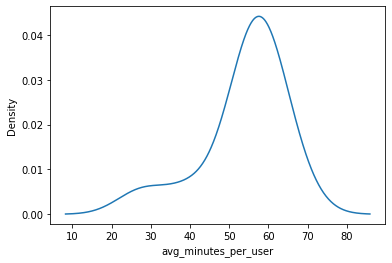

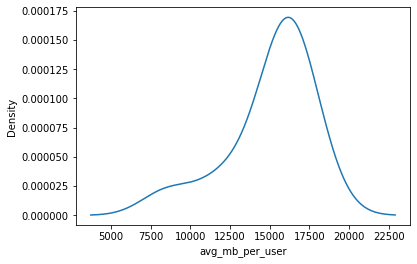

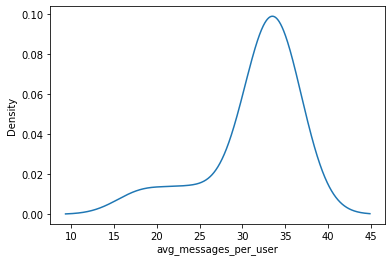

In [33]:
print("Smart")
plotting(smart_data)

Как видно из графиков плостостей, наши наборы данных скошены вправо. Это означает, что пользователи стремятся использовать побольше предоставленных их минут, сообщений и мегабайт. Обратившись к условиям тарифного плана Smart, можно сделать вывод, что в среднем люди не используют все отведенные им минуты (500 в месяц) и сообщения (50 в месяц), а вот интернет-трафик успешно перерасходуют (15гб).

Основываясь на полученных графиках и данных о среднем, дисперсии и стандартном отклонении можно сделать предположение, что чтобы тариф лучше соответствовал потребностям клиентов, а так же приносил дополнительную прибыль в виде платы за перерасходованные минуты, сообщения и мегабайты, имеет смысл рассмотреть возможность снижения лимитов до 70 минут, 35 сообщений и поднять лимит интернет трафика до 17.5 гб.

Ultra


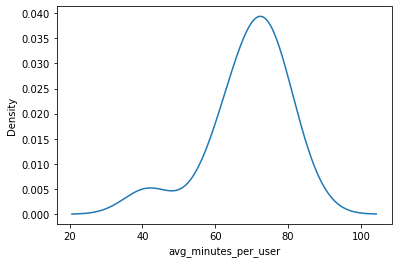

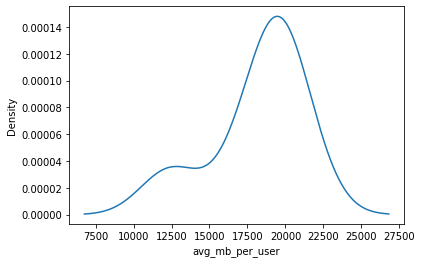

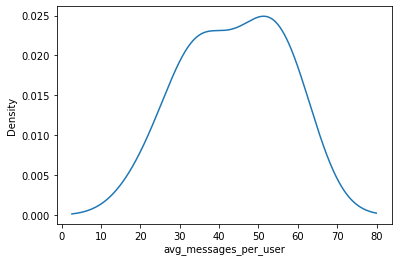

In [34]:
print("Ultra")
plotting(ultra_data)

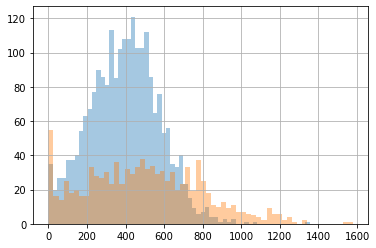

In [79]:
total_calls_messages_internet_per_user_per_month.query('tariff == "smart"')['total_duration'].hist(bins=60, alpha = 0.4)
total_calls_messages_internet_per_user_per_month.query('tariff == "ultra"')['total_duration'].hist(bins=60, alpha = 0.4)

In [80]:
# немного изменим ранее описанную функцию, теперь она будет работать на другом срезе данных и считать еще и интервал 2 сигмы
def mean_variance_std_2(tariff_name,column):
    
    tariff = total_calls_messages_internet_per_user_per_month.query('tariff == @tariff_name')
    
    mean = tariff[column].mean()
    
    variance = np.var(tariff[column], ddof=1)

    std = math.sqrt(variance)
    
    print('Среднее количество в месяц 1 клиентом {:.2f}'.format(mean))
    print('Дисперсия среднего количества в месяц 1 клиентом {:.2f}'.format(variance))
    print ('Стандартное отклонение в месяц 1 клиентом {:.2f}'.format(std))
    print ('Интервал  двух сигм:(',int(mean-2*std),';',int(mean+2*std),')')
    print ('Интервал трех сигм:(',int(mean-3*std),';',int(mean+3*std),')')


# подергаем за ранее описанную функцию

print("Тариф 'SMART'")
print("\nИспользованные минуты")
mean_variance_std_2("smart",'total_duration')

print("\nИспользованные мегабайты")
mean_variance_std_2("smart",'mb_used')

print("\nИспользованные сообщения")
mean_variance_std_2("smart",'total_messages')


print("\nТариф 'ULTRA'")
print("\nИспользованные минуты")
mean_variance_std_2("ultra",'total_duration')

print("\nИспользованные мегабайты")
mean_variance_std_2("ultra",'mb_used')

print("\nИспользованные сообщения")
mean_variance_std_2("ultra",'total_messages')

Тариф 'SMART'

Использованные минуты
Среднее количество в месяц 1 клиентом 394.43
Дисперсия среднего количества в месяц 1 клиентом 32386.40
Стандартное отклонение в месяц 1 клиентом 179.96
Интервал  двух сигм:( 34 ; 754 )
Интервал трех сигм:( -145 ; 934 )

Использованные мегабайты
Среднее количество в месяц 1 клиентом 16208.39
Дисперсия среднего количества в месяц 1 клиентом 34462496.46
Стандартное отклонение в месяц 1 клиентом 5870.48
Интервал  двух сигм:( 4467 ; 27949 )
Интервал трех сигм:( -1403 ; 33819 )

Использованные сообщения
Среднее количество в месяц 1 клиентом 33.38
Дисперсия среднего количества в месяц 1 клиентом 796.81
Стандартное отклонение в месяц 1 клиентом 28.23
Интервал  двух сигм:( -23 ; 89 )
Интервал трех сигм:( -51 ; 118 )

Тариф 'ULTRA'

Использованные минуты
Среднее количество в месяц 1 клиентом 497.07
Дисперсия среднего количества в месяц 1 клиентом 89942.50
Стандартное отклонение в месяц 1 клиентом 299.90
Интервал  двух сигм:( -102 ; 1096 )
Интервал трех сигм:(

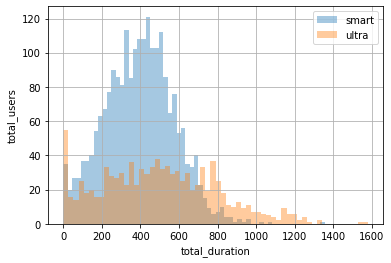

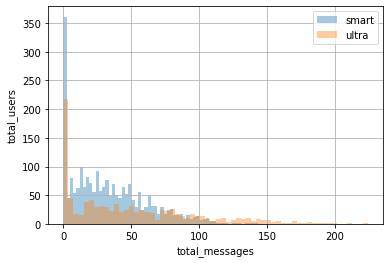

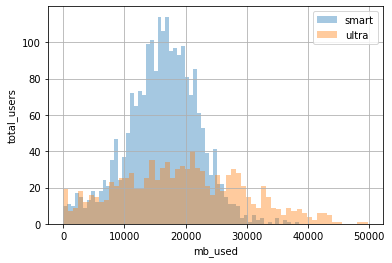

In [78]:
# построим график по количеству минут
total_calls_messages_internet_per_user_per_month.query('tariff == "smart"')['total_duration'].hist(bins=60, alpha = 0.4, label='smart')
total_calls_messages_internet_per_user_per_month.query('tariff == "ultra"')['total_duration'].hist(bins=60, alpha = 0.4, label = 'ultra')
plt.xlabel('total_duration')
plt.ylabel('total_users')
plt.legend()
plt.show()

# построим график по количеству сообщений 
total_calls_messages_internet_per_user_per_month.query('tariff == "smart"')['total_messages'].hist(bins=60, alpha = 0.4, label='smart')
total_calls_messages_internet_per_user_per_month.query('tariff == "ultra"')['total_messages'].hist(bins=60, alpha = 0.4, label = 'ultra')
plt.xlabel('total_messages')
plt.ylabel('total_users')
plt.legend()
plt.show()

# построим график по количеству трафика
total_calls_messages_internet_per_user_per_month.query('tariff == "smart"')['mb_used'].hist(bins=60, alpha = 0.4, label='smart')
total_calls_messages_internet_per_user_per_month.query('tariff == "ultra"')['mb_used'].hist(bins=60, alpha = 0.4, label = 'ultra')
plt.xlabel('mb_used')
plt.ylabel('total_users')
plt.legend()
plt.show()


## Вывод
Обратившись к условиям тарифного плана Smart, можно сделать вывод, что в среднем люди используют все отведенные им минуты (500 в месяц) и сообщения (50 в месяц) и интернет-трафик (15гб). При этом достаточное количество клиентов перерасходует лимиты и соответственно делает дополнительную выручку компании. 

Основываясь на полученных графиках и данных о среднем, дисперсии и стандартном отклонении можно сделать предположение, что чтобы тариф лучше соответствовал потребностям клиентов, а так же приносил дополнительную прибыль в виде платы за перерасходованные минуты, сообщения и мегабайты, имеет смысл рассмотреть возможность увеличения лимитов до 600 минут, 75 сообщений и 20 гб интернет трафика.


Обратившись к условиям тарифного плана Ultra, можно сделать вывод, что в среднем люди не используют все отведенные им минуты (3000 в месяц), сообщения (1000 в месяц) и интернет-трафик (30гб). При этом присутствует достаточное количество клиентов, которые все таки используют весь отведенный трафик и даже используют трафик сверх пакета.

Основываясь на полученных графиках и данных о среднем, дисперсии и стандартном отклонении можно сделать предположение, что чтобы  тариф лучше соответствовал потребностям клиентов, а так же приносил дополнительную прибыль в виде платы за перерасходованные минуты, сообщений и мегабайтов, а с другой снижал заложенную себестоимость - имеет смысл рассмотреть возможность снижения лимитов до 1000 минут, 150 сообщений и 25 гб интернет-трафика в месяц.

## Проверка гипотез
Проверим 2 гипотезы:
- средняя выручка пользователей тарифов Ultra и Smart различается;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.


Для гипотезы о различии средней выручки пользователей разных тарифов, нулевая гипотеза будет звучать как "средняя выручка пользователей тарифа Ultra не отличается от средней выручки пользователей тарифа Smart", а альтернативная - " средняя выручка пользователей тарифов Ultra и Smart различается", причем в альтернативной гипотезе нас не интересует, в какую сторону отличие.

In [34]:
# возьмем данные
data_for_check = total_calls_messages_internet_per_user_per_month.pivot_table(index=['user_id','month','tariff'], values='total_income', aggfunc=('sum')).reset_index()

data_for_check


alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    data_for_check.query('tariff == "smart"')['total_income'],
    data_for_check.query('tariff == "ultra"')['total_income'] 
    )

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.198394342316496e-213
Отвергаем нулевую гипотезу


Вероятность случайно получить различие средних выручек на генеральных совокупностях пользователей тарифов Smart и Ultra ничтожно мала, поэтому отвергаем гипотезу о равенстве средних выручек пользователей тарифов Ultra и Smart. Другими словами, мы не отвергаем поставленную гипотезу, что среднее выручка пользователей тарифов Ultra и Smart различается.

Проверим вторую гипотезу, о различии средней вывручки пользователей из Москвы и из других регионов. Нулевая гипотеза будет звучать как "средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов", а альтернативная "средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов", причем нас опять не интересует в какую сторону.

In [35]:

# возьмем данные
data_for_check = total_calls_messages_internet_per_user_per_month.pivot_table(index=['user_id','month','tariff'], values='total_income', aggfunc=('sum')).reset_index()

# обоготим данные добавив в них город
data_for_check=data_for_check.merge(users_data[['user_id','city']], left_on='user_id', right_on='user_id', how='outer')


# поскольку мы знаем что в исходных данных нет пропусков, то в объединенных заменим пропуски на 0. Эту логику описывали ранее
data_for_check = data_for_check.fillna(0)

alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    data_for_check.query('city == "Москва"')['total_income'],
    data_for_check.query('city != "Москва"')['total_income'] 
    )

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    


p-значение: 0.3954671422198973
Не получилось отвергнуть нулевую гипотезу


Вероятность случайно получить различие средних выручек на генеральных совокупностях клиентов из Москвы и из других городов страны огромна (40%), а это значит, что мы не можем просто так взять и отвергнуть гипотезу о равенстве средних выручек. Другими словами, мы отвергаем альренативную гипотезу о различии выручек пользователей из Москвы и из других регионов с вероятностью ошибки не более 5%.

Проверим еще одну гипотезу: о различии средней вывручки пользователей из Москвы и из других регионов в зависимости от используемого тарифа. Москва большой и богатый город, пользователи привыкли использовать больше интернета и гораздо больше общаться, поэтому разница средних выручек на более дешевом тарифе будет существенной.

results = st.ttest_ind(
    data_for_check.query('city == "Москва" and tariff== "smart"')['total_income'],
    data_for_check.query('city != "Москва" and tariff== "smart"')['total_income'] 
    )

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Нет, как и для Москвы в целом, нельзя отвергнуть гипотезу о равенстве средних выручек на генеральных совокупностях клиентов на тарифе Smart из Москвы и из других городов страны. Вероятность случайно получить разницу, в отличае от предыдущего случая хоть и снизилась почти в 2 раза, но все еще остается большой (16%)

 ## Вывод
 
- Мы не отвергаем гипотезу о том, что средняя выручка пользователей тарифов Ultra и Smart различается, потому что вероятность случайного получения разницы средних выручек на генеральных совокупностях ничтожна мала при уровне ошибки в 5%. Это впринципе логично, с учетом того, что Ultra стоит почти в 4 раза дороже и основная масса клиентов, не зависимо от выбранного тарифа, не очень хочет превышать ограничения тарифов.

- Мы отвергаем гипотезу о том, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов, потому что вероятность случайного получения разницы средних выручек на генеральных совокупностях огромна (при уровне ошибки в 5%). При этом, внутреннюю гипотезу о различии средний выручки пользователей тарифа Smart в Москве и за ее пределами мы так же отвергаем на 5% уровне.
 

## Общий вывод

Главный попрос исследования: "Какой тариф лучше?"

Однозначного вывода, какой тариф лучше - сделать нельзя. 
Оба тарифа хороши. Как для клиентов, так и для оператора.
Безусловно, тариф Ultra хорош для оператора, потому что на нем клиенты реже превышают установленные лимиты, а это озночает, что заложенные в тариф расходы фактически оказываются ниже. Однако при использовании тарифа Smart, на котором пользователи чаще превышают установленные лимиты, оператор получает дополнительную плату, за использование услуг сверх включенных в тариф. Оба тарифа весь год показывали рост выручки, что несомненно говорит о том, что они оба хороши. С точки зрения маркетинга и работы с себестоимостью, тариф Ultra обладает большим потенциалом, в плане акционного привлечения клиентов, что может привести к увеличению числа абонентов.